Лабораторная работа № 4 – Регрессионный анализ данных
Вариант 2
Муминов А

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from  sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

from scipy.stats import pearsonr, spearmanr
%matplotlib inline

In [3]:
df = pd.read_csv("autos.csv", encoding = 'latin1')


In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [5]:
df.shape

(371528, 20)

In [6]:
df.drop_duplicates(keep = "first", inplace = True)
df.dropna
print(df.shape)

(371524, 20)


3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [7]:

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']

print(f"Numerical: {numerical_columns}")

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures', 'postalCode']


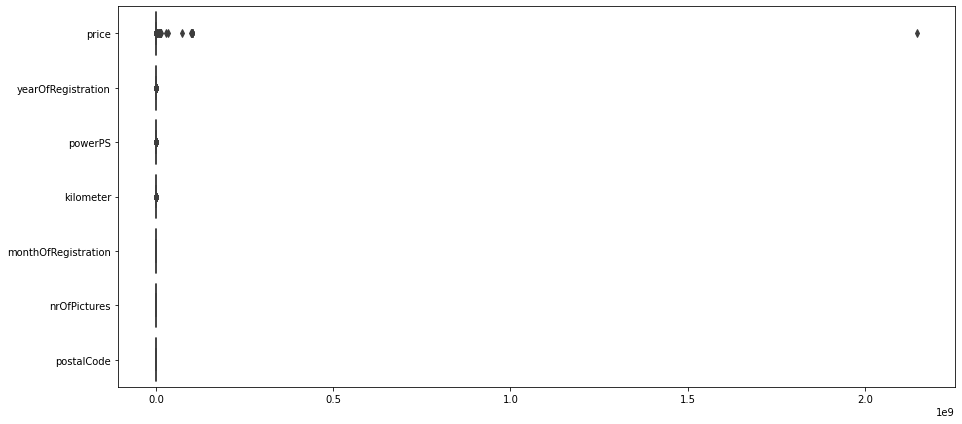

In [8]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns], orient = 'h')
plt.show()

In [9]:
scaler = MinMaxScaler()
# Нормализируем
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

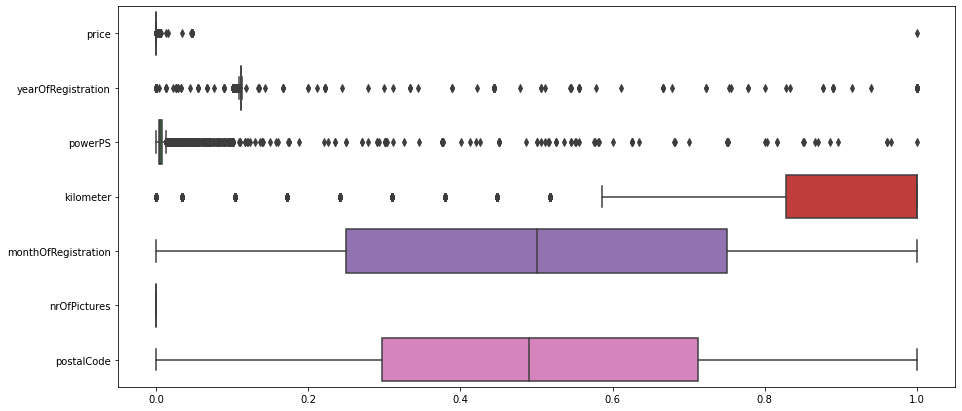

In [10]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns], orient = 'h')
plt.show()

4. Выполните замену категориальных признаков

In [11]:
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print("Categorical: " + str(categorial_columns))


Categorical: ['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen']


In [12]:
encoder = LabelEncoder()
for i in categorial_columns:
    df[i] = encoder.fit_transform(df[i])
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,164563,79207,1,0,2.235174e-07,1,8,0.110346,1,0.00000,118,1.000000,0.000000,1,38,2,99,0.0,0.701176,178839
1,164294,4112,1,0,8.521602e-06,1,3,0.112346,1,0.00950,251,0.827586,0.416667,3,1,0,99,0.0,0.665989,178355
2,76564,90564,1,0,4.563481e-06,1,7,0.111568,0,0.00815,119,0.827586,0.666667,3,14,2,89,0.0,0.903792,162956
3,106204,76592,1,0,6.984919e-07,1,4,0.111235,1,0.00375,118,1.000000,0.500000,1,38,1,92,0.0,0.909796,45272
4,231164,170493,1,0,1.676381e-06,1,4,0.112012,1,0.00345,103,0.586207,0.583333,3,31,1,106,0.0,0.600115,171913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,79620,177981,1,0,1.024455e-06,1,8,0.111679,2,0.00000,251,0.103448,0.083333,7,33,2,89,0.0,0.389251,168588
371524,5117,175587,1,0,5.583279e-07,1,2,0.111123,0,0.00505,108,0.827586,0.250000,1,32,1,80,0.0,0.253389,16325
371525,121891,214317,1,0,4.284084e-06,1,1,0.110679,1,0.00510,225,1.000000,0.250000,3,38,1,94,0.0,0.873053,180083
371526,131927,191702,1,0,1.583248e-06,1,5,0.111346,1,0.00500,118,1.000000,0.500000,3,38,2,95,0.0,0.401259,82280


5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

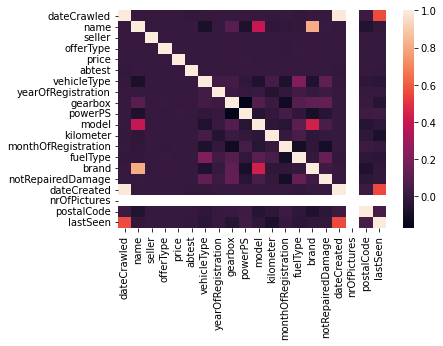

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);


<AxesSubplot:>

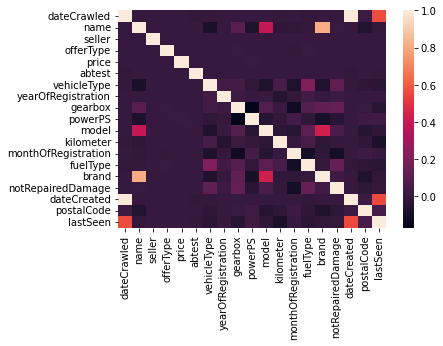

In [14]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix)

6. Заполните пропущенные значения в данных;

In [15]:
check = df.isnull().sum()
print(check)

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


In [16]:
check.sum()

0

7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [17]:
# Линейная регрессия - без регуляризаторов
X, y = df.drop(['price'], axis=1), df['price']
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = linear_model.LinearRegression()
# Выполняем обучение модели
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
# Выводим разницу между реальным значением и предсказанным
print(pred_reg - y_test)

30782    -2.427744e-06
148236    6.088081e-06
43751     2.130194e-06
202566    2.726293e-06
300629    1.052243e-06
              ...     
20863    -4.082451e-06
344630    5.996072e-06
328151    1.063804e-06
323053    6.223633e-06
150696   -6.762861e-07
Name: price, Length: 74305, dtype: float64


In [18]:
# Коэфф-ты корреляции
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.0030903449028611093 p_value: 0.3995734876928771
Spearmen correlation: 0.18037865023233193 p_value: 0.0


In [19]:
# Линейная регрессия - RIDGE
import warnings
warnings.filterwarnings("ignore")
reg = linear_model.Ridge()
params = {'alpha': np.arange(0, 1, 0.05)}
reg_grid = GridSearchCV(reg, params)
# Выполняем обучение модели
reg_grid.fit(X_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha: ', end = '')
print('%.2f' % best_alpha)

best alpha: 0.95


In [20]:
reg = linear_model.Ridge(alpha=best_alpha)
reg.fit(X_train,y_train)

pred_reg = reg.predict(X_test)

print(pred_reg - y_test)

30782    -2.424826e-06
148236    6.080514e-06
43751     2.129900e-06
202566    2.723148e-06
300629    1.059517e-06
              ...     
20863    -4.086978e-06
344630    6.003480e-06
328151    1.068019e-06
323053    6.226421e-06
150696   -6.799223e-07
Name: price, Length: 74305, dtype: float64


In [21]:
# Коэфф-ты корреляции
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.0031746279477478127 p_value: 0.3868425118704825
Spearmen correlation: 0.17976706883559634 p_value: 0.0
